In [1]:
import os
from keras.applications.vgg16 import VGG16   # input shape-224,224,3
from keras.preprocessing.image import ImageDataGenerator     # image augmentation
from keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import cv2
import numpy as np
# from tf2_yolov4.model import YOLOv4
# from tf2_yolov4.anchors import YOLOV4_ANCHORS
# model = YOLOv4(num_classes=4,input_shape=(64,64,4),anchors=YOLOV4_ANCHORS)

In [2]:
train_path=r'C:\Users\user\OneDrive\Desktop\ML_task_new\train'
test_path=r'C:\Users\user\OneDrive\Desktop\ML_task_new\test'

In [3]:
vgg=VGG16(input_shape=[224,224,3],weights='imagenet',include_top=False) 

In [4]:
# Not to train vgg16 again
for layer in vgg.layers:
  layer.trainable=False

In [5]:
x=Flatten()(vgg.output)  
prediction=Dense(4,activation='softmax')(x)

In [6]:
from keras.models import Model 
model=Model(inputs=vgg.input,outputs=prediction)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
from numpy.random import test
train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=16,                               
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode='categorical')

Found 202 images belonging to 4 classes.


Found 51 images belonging to 4 classes.


In [10]:
print(training_set.filenames)

['bottom left\\1-crop.jpg', 'bottom left\\1.png', 'bottom left\\10-crop.jpeg', 'bottom left\\11-crop.jpeg', 'bottom left\\12-crop.jpg', 'bottom left\\13-crop.jpeg', 'bottom left\\14-crop.jpeg', 'bottom left\\15-crop.jpeg', 'bottom left\\16-crop.jpeg', 'bottom left\\18-crop.jpeg', 'bottom left\\19-crop.jpeg', 'bottom left\\2-crop.jpeg', 'bottom left\\2.jpg', 'bottom left\\24-crop.jpeg', 'bottom left\\29-crop.jpeg', 'bottom left\\3-crop.jpeg', 'bottom left\\3.jpg', 'bottom left\\31-crop.jpeg', 'bottom left\\37-crop.jpeg', 'bottom left\\4-crop.jpeg', 'bottom left\\44-crop.png', 'bottom left\\45-crop.png', 'bottom left\\46-crop.jpeg', 'bottom left\\47-crop.png', 'bottom left\\48-crop.png', 'bottom left\\49-crop.png', 'bottom left\\5-crop.jpeg', 'bottom left\\50-crop.png', 'bottom left\\51-crop.png', 'bottom left\\52-crop.png', 'bottom left\\53-crop.png', 'bottom left\\65-crop.jpg', 'bottom left\\66-crop.jpg', 'bottom left\\67-crop.jpg', 'bottom left\\68-crop.jpg', 'bottom left\\69-crop.jpg

In [11]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=10)

C:\Users\user\AppData\Local\Temp\ipykernel_2912\347333967.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,validation_data=test_set,epochs=10)


Epoch 1/10
13/13 [==============================] - 59s 5s/step - loss: 1.8572 - accuracy: 0.3614 - val_loss: 1.4063 - val_accuracy: 0.3529
Epoch 2/10
13/13 [==============================] - 61s 5s/step - loss: 1.2794 - accuracy: 0.4752 - val_loss: 1.2693 - val_accuracy: 0.5098
Epoch 3/10
13/13 [==============================] - 62s 5s/step - loss: 0.9754 - accuracy: 0.6139 - val_loss: 1.2255 - val_accuracy: 0.5098
Epoch 4/10
13/13 [==============================] - 62s 5s/step - loss: 0.8904 - accuracy: 0.6188 - val_loss: 0.9818 - val_accuracy: 0.6471
Epoch 5/10
13/13 [==============================] - 61s 5s/step - loss: 0.5830 - accuracy: 0.7921 - val_loss: 1.0448 - val_accuracy: 0.5490
Epoch 6/10
13/13 [==============================] - 105s 8s/step - loss: 0.5585 - accuracy: 0.7525 - val_loss: 0.8432 - val_accuracy: 0.6078
Epoch 7/10
13/13 [==============================] - 60s 4s/step - loss: 0.4536 - accuracy: 0.8119 - val_loss: 0.8539 - val_accuracy: 0.6275
Epoch 8/10
13/13 [=

In [12]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np

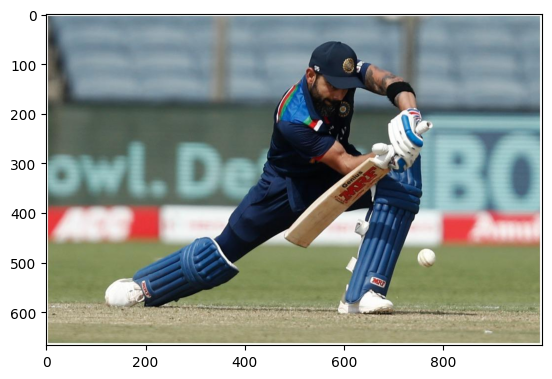

In [23]:
img=imread(r'C:\Users\user\OneDrive\Desktop\ML_task_new\input_image_kohli.jpg')
plt.imshow(img)

In [24]:
img=resize(img,(224,224,3))
img_array=np.array(img)
img_array=img_array.reshape(1,224,224,3)

In [25]:
categories=['top left','top right','bottom left','bottom right']

In [26]:
pred=model.predict(img_array)
print(pred)

1/1 [==============================] - 0s 329ms/step
[[1.3410222e-03 1.6109832e-05 8.9117384e-01 1.0746897e-01]]


In [27]:
ind=pred.argmax()  # max percentage in class labels
print(ind)
print(categories[ind])

2
bottom left


In [28]:
model.save('cricket_bat_corner_model.h5')

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
